### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [7]:
#download the weather images and put them in a directory
path = r'C:\Users\nodnarb\Documents\Machine Learning\04 Weather'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


### 2. Processing weather images

In [9]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [11]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

### 3. Testing and running model

In [38]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 12, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/12
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 345ms/step - accuracy: 0.9026 - loss: 0.0401 - val_accuracy: 0.8795 - val_loss: 0.0541
Epoch 2/12
 1/28 ━━━━━━━━━━━━━━━━━━━━ 6s 253ms/step - accuracy: 0.9375 - loss: 0.0185

C:\Users\nodnarb\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9375 - loss: 0.0185 - val_accuracy: 0.8571 - val_loss: 0.0606
Epoch 3/12
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 329ms/step - accuracy: 0.9407 - loss: 0.0227 - val_accuracy: 0.8661 - val_loss: 0.0563
Epoch 4/12
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 0.8661 - val_loss: 0.0584
Epoch 5/12
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 325ms/step - accuracy: 0.9639 - loss: 0.0150 - val_accuracy: 0.8661 - val_loss: 0.0552
Epoch 6/12
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.8571 - val_loss: 0.0607
Epoch 7/12
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 327ms/step - accuracy: 0.9653 - loss: 0.0157 - val_accuracy: 0.8616 - val_loss: 0.0603
Epoch 8/12
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9688 - loss: 0.0131 - val_accuracy: 0.8839 - val_loss: 0.0555
Epoch 9/12
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 328ms/step - accuracy: 0.9558 - loss: 0.0165 - val_accuracy: 0.9018 - val_loss

In [40]:
results = pd.DataFrame(model.history.history)

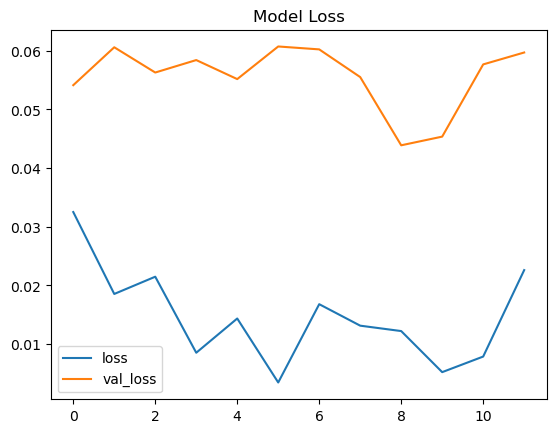

In [42]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

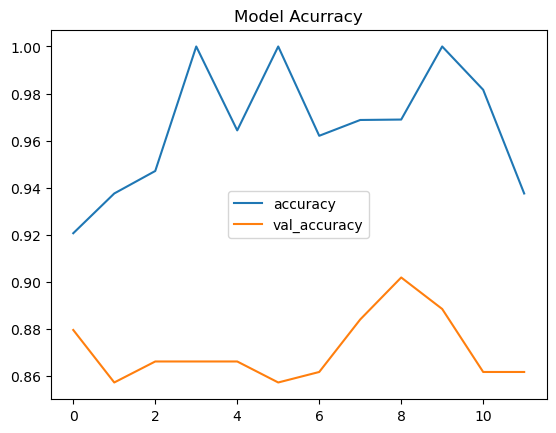

In [44]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [46]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9375, Val_Accuracy: 0.8616071343421936
Loss: 0.02259860187768936, Val_Loss: 0.05971978232264519


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


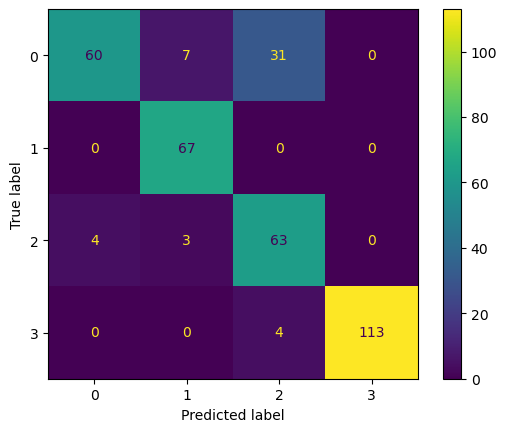

In [48]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [50]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


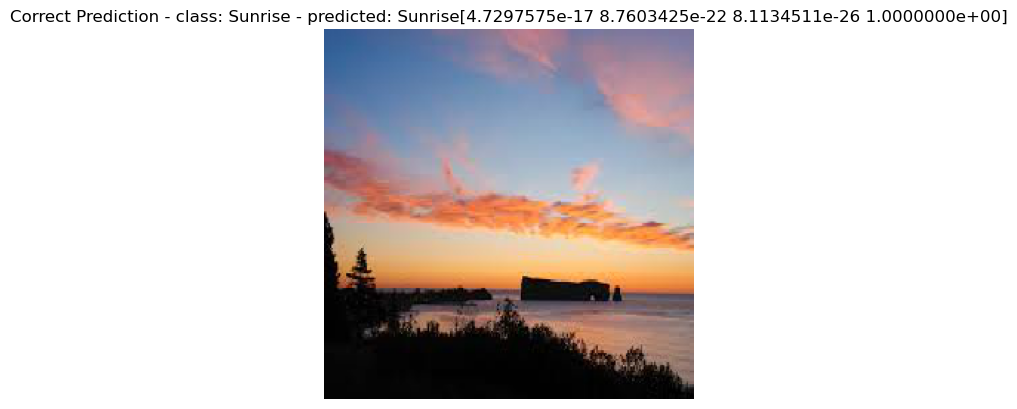

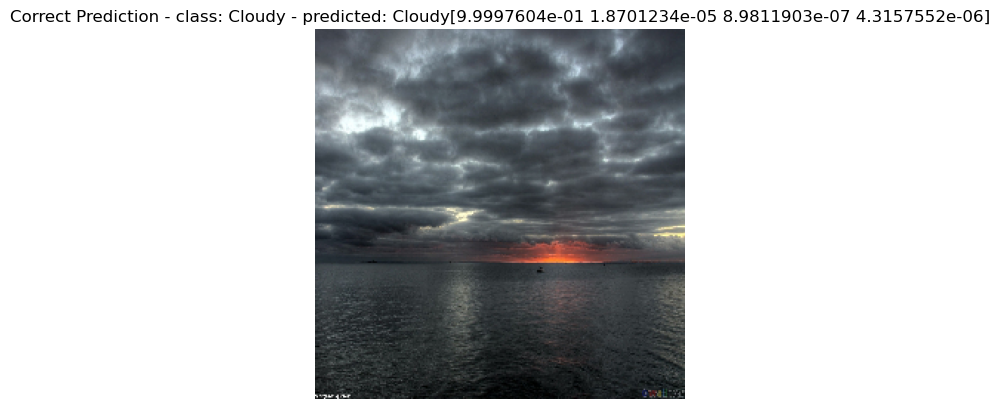

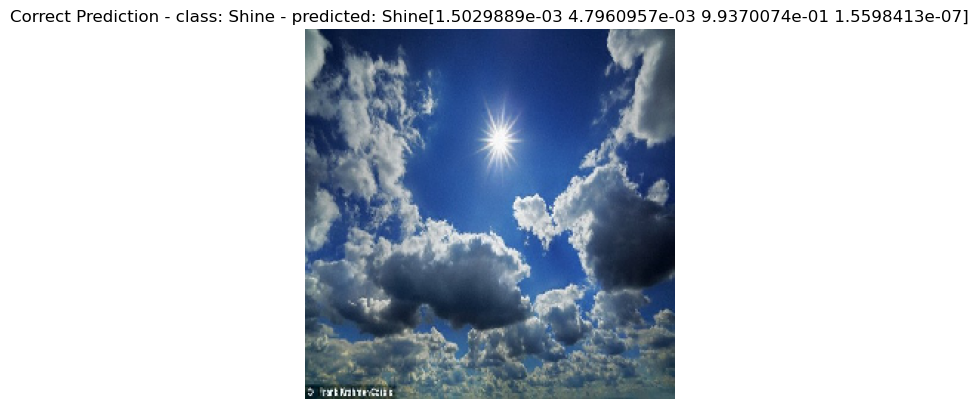

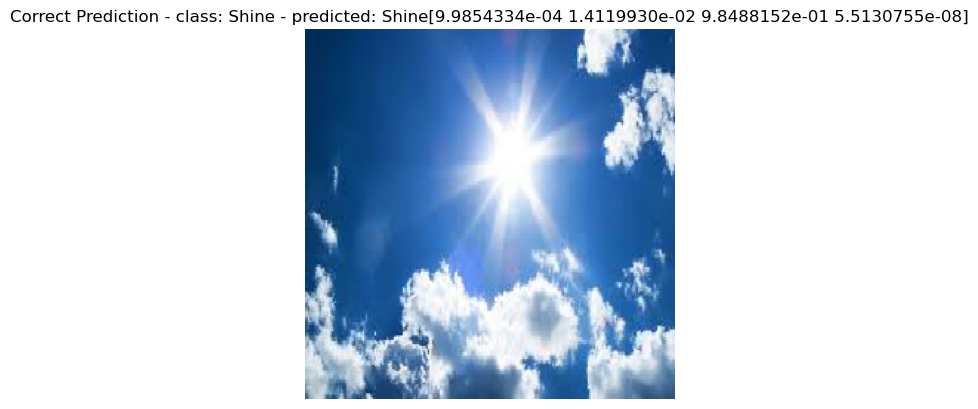

In [52]:
predict_one(model, 4) #<--you can show multiple pictures with this command. Just fill in the number you want to see.